<a href="https://colab.research.google.com/github/GabrielCPinto/Aprendendo_ML/blob/main/Aprendendo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/GabrielCPinto/Aprendendo_ML.git
!pip install opencv-python
!sudo apt install tesseract-ocr
!apt-get install tesseract-ocr-por
!pip install pytesseract

Cloning into 'Aprendendo_ML'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144 (from 1)
Receiving objects: 100% (148/148), 37.21 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00

In [3]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-04-07 23:23:06--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-04-07 23:23:07--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-04-07 23:23:07--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [ ]:
text = pytesseract.image_to_string(img, config=config_tesseract, lang='por')
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [1]:
import pytesseract
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from pytesseract import Output
import re

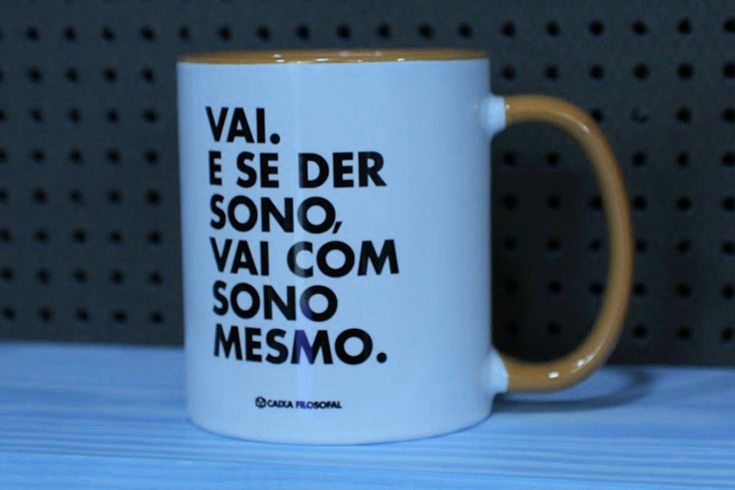

In [ ]:
img = cv2.imread('/content/Aprendendo_ML/Imagens/Aula4-caneca2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

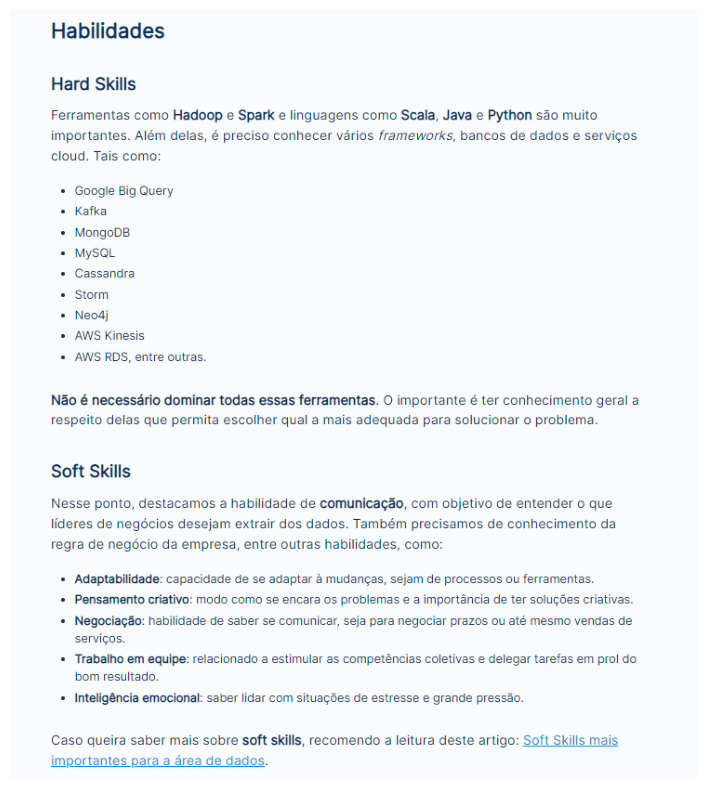

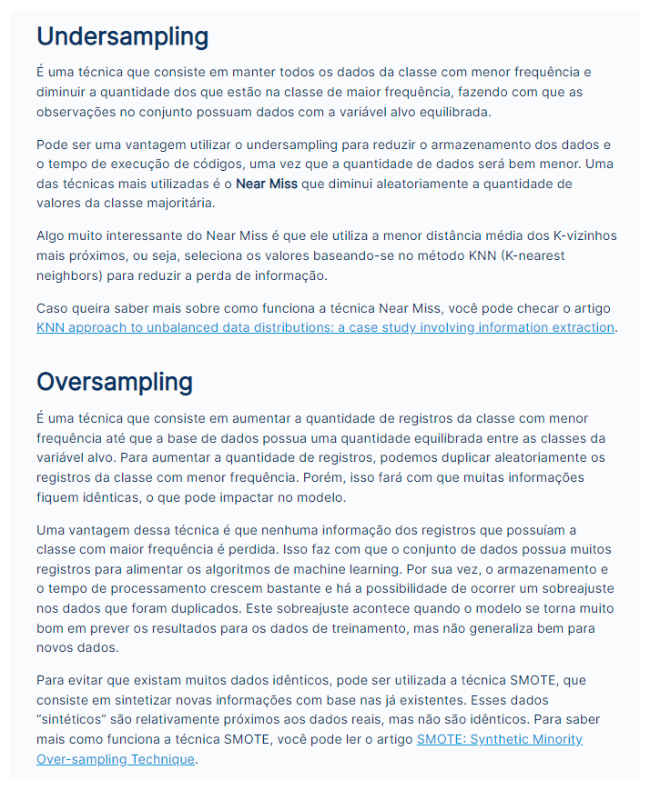

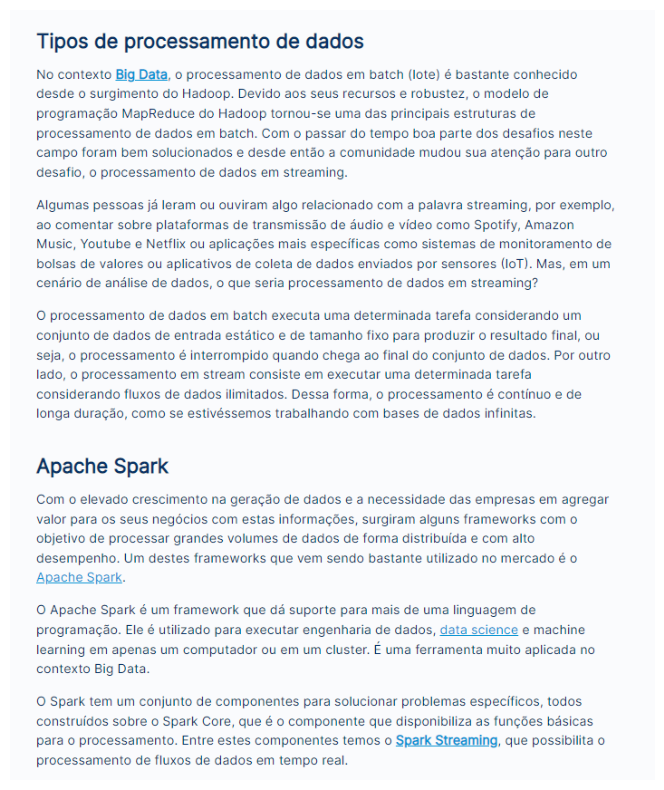

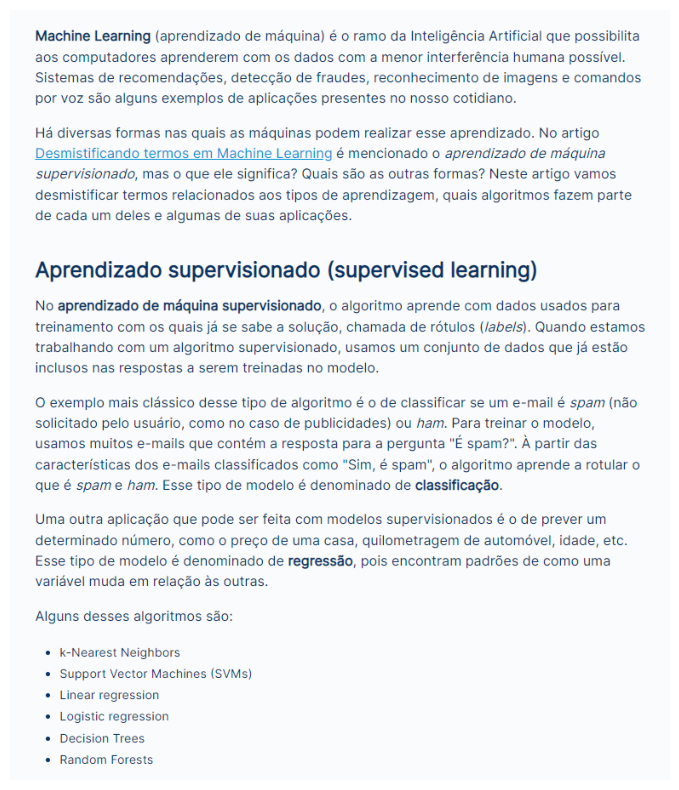

In [23]:
projeto = '/content/Aprendendo_ML/Imagens/Projeto'
path = [os.path.join(projeto, f) for f in os.listdir(projeto)]

for img in path:
  img = cv2.imread(img)
  show(img)

In [3]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [4]:
config_tesseract = '--tessdata-dir tessdata'

def OCR_process(img, config_tesseract):
  text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return text

In [43]:
min_conf = 30 #@param {type: 'slider', min:0, max:100}
fonte = '/content/Aprendendo_ML/Imagens/calibri.ttf'

In [40]:
def caixa_texto(i, res, img, cor = (0, 0, 255)):
  x = res['left'][i]
  y = res['top'][i]
  w = res['width'][i]
  h = res['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x,y, img

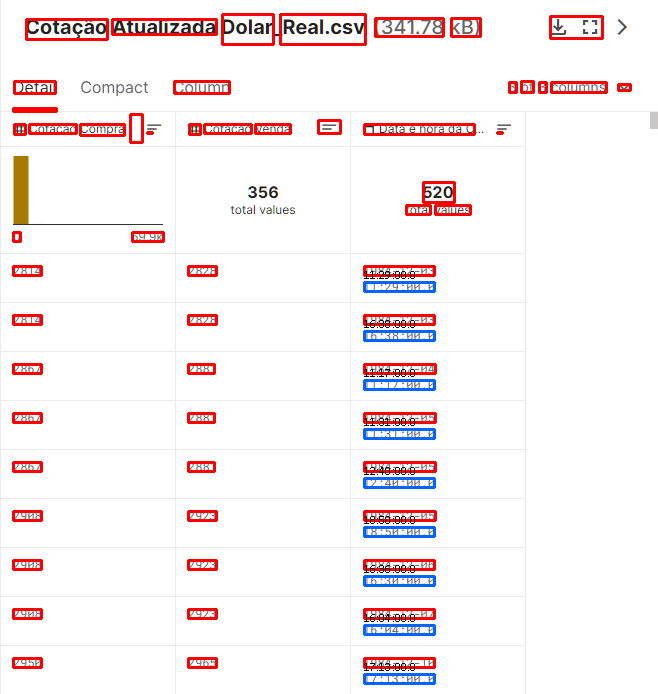

In [ ]:
datas = []
img_copy = img.copy()
for i in range(0, len(text['text'])):
  conf = int(round(text['conf'][i]))
  if conf > min_conf:
    texto = text['text'][i]
    if re.match(data_pattern, texto):
      x,y, img = caixa_texto(text, img_copy, cor=(255,100,0))
      img_copy = escreve_texto(texto, x, y, img_copy, fonte, 12)
      datas.append(texto)
    else:
     x,y, img = caixa_texto(text, img_copy)
cv2_imshow(img_copy)

In [22]:
def escreve_texto(texto, x, y, img, fonte, tam_texto=32):
  fonte = ImageFont.truetype(fonte, tam_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tam_texto), texto, font=fonte, fill=(0,0,0))

  img = np.array(img_pil)
  return img

In [ ]:
os.makedirs('images_tesseract', exist_ok=True)
logo_tesseract = '/content/images_tesseract/logo_tesseract.png'
cv2.imwrite(logo_tesseract, img_copy)

True

In [ ]:
datas

['16:38:00.0', '11:17:00.0', '11:31:00.0', '16:04:00.0', '17:13:00.0']

In [ ]:
data_pattern = '^([01]?[\d]|2[0-3]):[0-5][\d]:[0-5][\d].\d$'

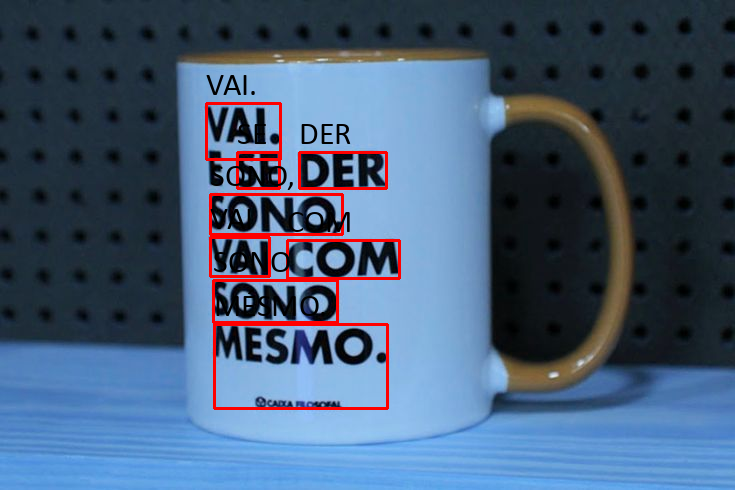

In [ ]:
img_copy = img.copy()
for i in range(0, len(text['text'])):
  conf = int(round(text['conf'][i]))
  if conf > min_conf:
    texto = text['text'][i]
    if len(texto) > 1:
      x,y, img = caixa_texto(text, img_copy)
      img_copy = escreve_texto(texto, x, y, img_copy, fonte)
cv2_imshow(img_copy)

In [15]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'

In [16]:
for imagem in path:
  img = cv2.imread(imagem)
  nome_img = os.path.split(imagem)[-1]
  nome_divisao = '==========\n' + str(nome_img)
  texto_completo += nome_divisao + '\n'
  text = OCR_process(img, config_tesseract)
  texto_completo += text

In [18]:
arq_txt = open(nome_txt, 'w+')
arq_txt.write(texto_completo + '\n')
arq_txt.close()

In [25]:
termo = 'learning'

In [19]:
with open (nome_txt) as f:
  ocorrencias = [i.start() for i in re.finditer(termo, f.read())]

artigo-eng-dados.png
num de ocur do termo: learning, texto:artigo-eng-dados.png, num ocurr: 0



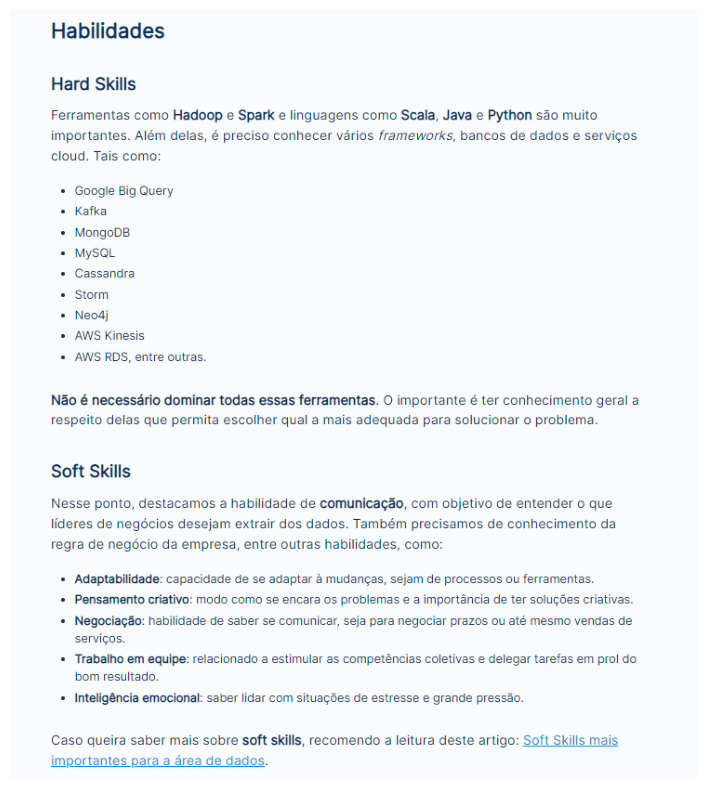

artigo-desbalanceamento.png
num de ocur do termo: learning, texto:artigo-desbalanceamento.png, num ocurr: 1



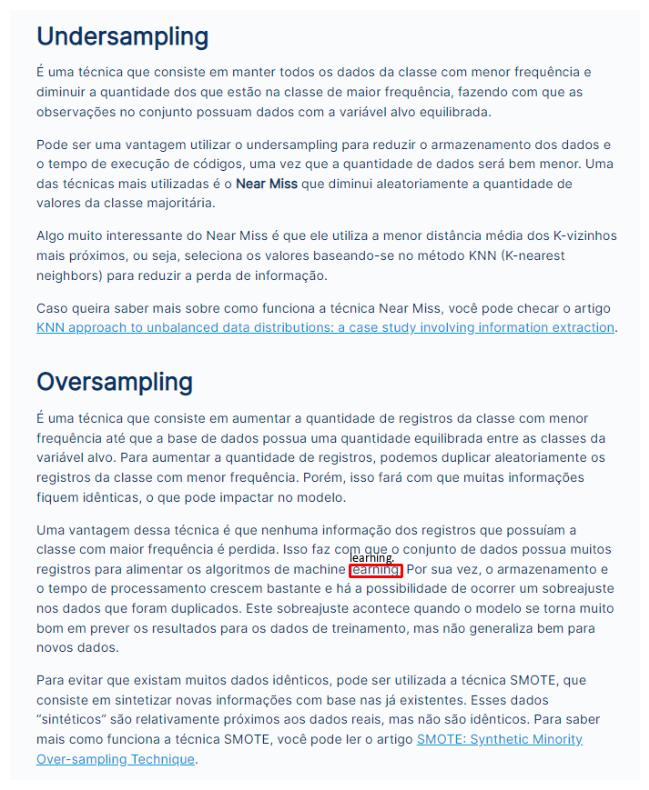

artigo-spark.png
num de ocur do termo: learning, texto:artigo-spark.png, num ocurr: 1



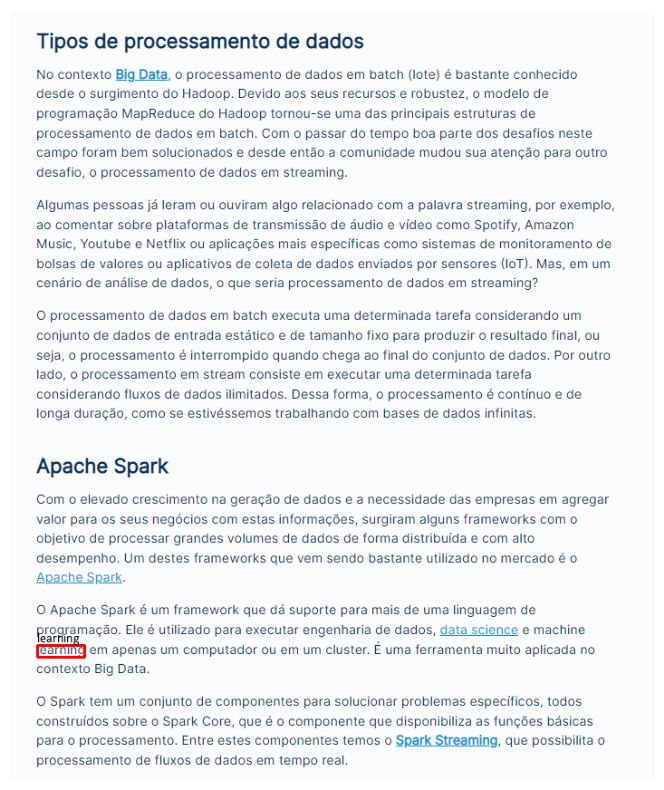

artigo-termos-ML.png
num de ocur do termo: learning, texto:artigo-termos-ML.png, num ocurr: 3



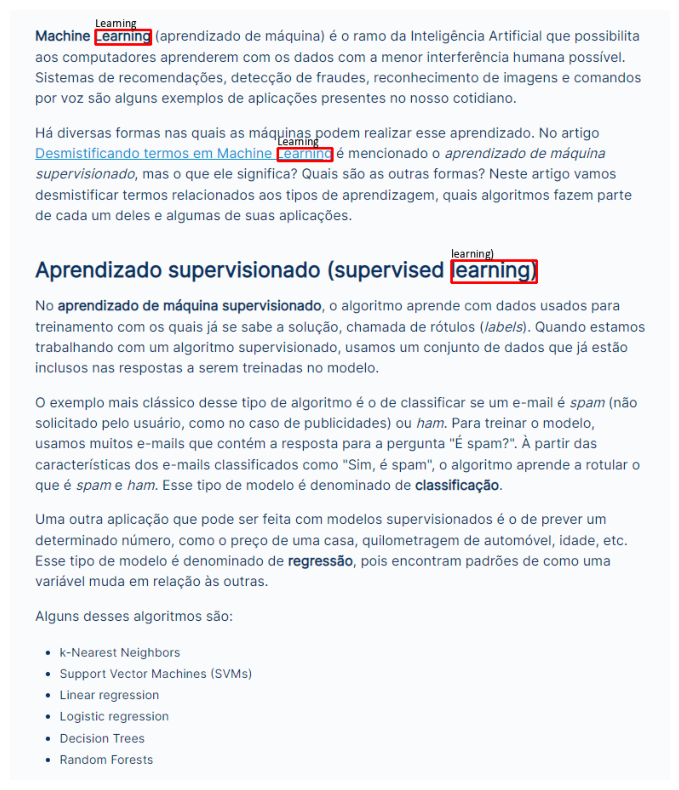

In [49]:
for imagem in path:
  img = cv2.imread(imagem)
  img_copy = img.copy()
  nome_img = os.path.split(imagem)[-1]
  print(f'==============\n{nome_img}')

  img, num_ocurr = OCR_process_img(img, termo, config_tesseract, min_conf)

  print(f'num de ocur do termo: {termo}, texto:{nome_img}, num ocurr: {num_ocurr}\n')
  show(img)

In [48]:
def OCR_process_img(img, termo, config_tesseract, min_conf):
  res = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocurr = 0
  for i in range(len(res['text'])):
    conf = int(res['conf'][i])
    if conf > min_conf:
      texto = res['text'][i]
      if termo.lower() in texto.lower():
        x, y, img = caixa_texto(i, res, img)
        img = escreve_texto(texto, x, y, img, fonte,tam_texto= 14)
        num_ocurr += 1
  return img, num_ocurr